# Criando Modelo de regressão linear simples

DataFrame com dados da COVID-19 do estado de SP

Meu objetivo aqui é mostrar justamente a relação do numero de casos com o numero de obitos no estado de SP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df = pd.read_csv("dados_covid_sp.csv", sep= ";")

In [3]:
df.head(10)

,nome_munic,codigo_ibge,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,semana_epidem
0,Adamantina,3500105,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Presidente Prudente,9,Marília,5,33894,9
1,Adolfo,3500204,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,9
2,Aguaí,3500303,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,35608,9
3,Águas da Prata,3500402,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,São João da Boa Vista,14,7797,9
4,Águas de Lindóia,3500501,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,Campinas,3,18374,9
5,Águas de Santa Bárbara,3500550,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Sorocaba,13,Bauru,12,5931,9
6,Águas de São Pedro,3500600,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Campinas,4,Piracicaba,11,3122,9
7,Agudos,3500709,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Bauru,3,Bauru,12,36134,9
8,Alambari,3500758,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Sorocaba,13,Sorocaba,6,5779,9
9,Alfredo Marcondes,3500808,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,0,"0,00000000000000e+00","0,000000000000000","0,000000000000000000",RA de Presidente Prudente,9,Presidente Prudente,2,3927,9


In [4]:
#checando valores nulos nas minhas variaveis de interesse.
df['casos'].isnull().values.any()

False

In [5]:
df['obitos'].isnull().values.any()

False

In [6]:
#analisando desvio padrão
np.std(df['obitos'])

1108.1034812660703

In [7]:
#conferindo correlação entre as variaveis
from scipy.stats.stats import pearsonr
pearsonr(df['obitos'], df['casos'])[0]

0.9931841655381779

In [8]:
x = [df['obitos'].min(), df['obitos'].max()]

In [9]:
y = [df['casos'].min(),df['casos'].max()]

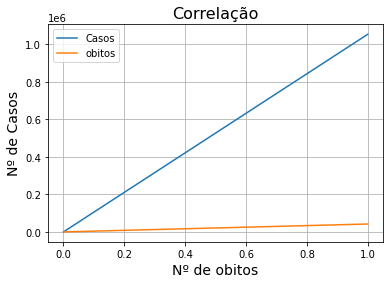

In [10]:
#validando a correação atraves de um gráfico
plt.title('Correlação', fontsize=16)
plt.plot(y, label = 'Casos')
plt.plot(x, label = 'obitos')
plt.ylabel("Nº de Casos", fontsize=14)
plt.xlabel("Nº de obitos", fontsize=14)
plt.grid()
plt.legend()

In [26]:
df['obitos'].count()

503880

In [27]:
from sklearn import linear_model

In [28]:
#criando objeto
meu_modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [29]:
#definindo variaveis x e y
comprimento = len(df)

In [30]:
x = df['casos'].values.reshape((comprimento, 1))

In [31]:
y = df['obitos'].values

In [32]:
#treinando meu modelo
meu_modelo.fit(x,y)

LinearRegression()

In [33]:
#Verificando coeficientes
meu_modelo.coef_

array([0.0391768])

In [34]:
meu_modelo.intercept_

-20.749075035552806

In [47]:
#imprimindo as previsões do meu modelo
print(meu_modelo.predict(x))

[-20.74907504 -20.74907504 -20.74907504 ...  -6.292836   -10.95487514
 -15.73444469]
